## Team Member Names: Madeline Witters {-}

## Project Title: Predicting Customer Churn and Identifying Attributes of At-Risk Customers {-}

In [81]:
import pandas as pd
import seaborn as sns

In [82]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
data = data.drop("customer_id", axis=1)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [108]:
#EDA to do list: 
# drop customer_id column DONE
# check for missing data DONE
# create categorical variables for age and credit_score ? Salary ?
# create boxplots for categorical variables
# create density plots/histograms for quantitative vars

#Definite categorical variables: Gender, Country, Active_Member (make sure coded as factor before regression)
#Definite quantitative variables: Balance (?), Age, Credit_Score
#Convert to categorical (?): Salary, Tenure, Products Number

In [84]:
null_check = data.isnull().any() #no missing data in the dataframe
null_check

credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [85]:
data.min()

credit_score           350
country             France
gender              Female
age                     18
tenure                   0
balance                0.0
products_number          1
credit_card              0
active_member            0
estimated_salary     11.58
churn                    0
dtype: object

In [86]:
data.max()

credit_score              850
country                 Spain
gender                   Male
age                        92
tenure                     10
balance             250898.09
products_number             4
credit_card                 1
active_member               1
estimated_salary    199992.48
churn                       1
dtype: object

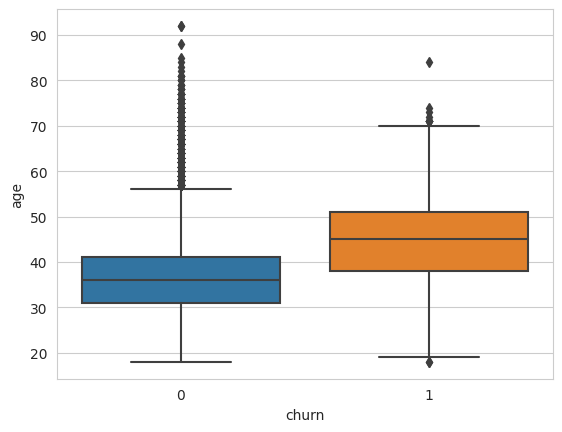

In [93]:
sns.set_style('whitegrid')
ax = sns.boxplot(x='churn', y='age', data=data)

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

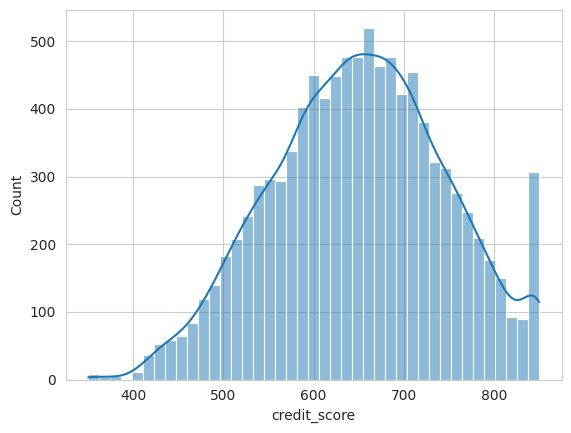

In [100]:
sns.histplot(data=data, x="credit_score", kde=True)

<AxesSubplot:xlabel='balance', ylabel='Count'>

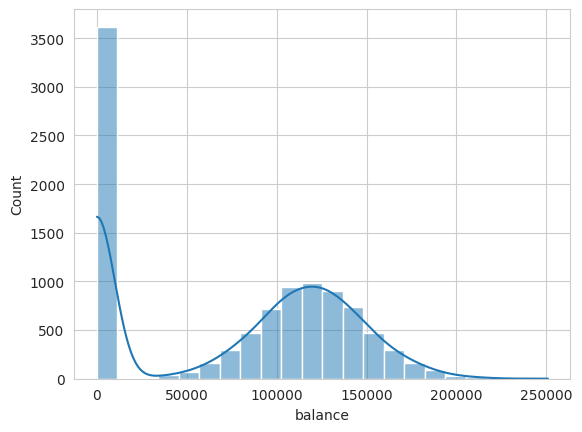

In [101]:
sns.histplot(data=data, x="balance", kde=True)

<AxesSubplot:xlabel='estimated_salary', ylabel='Count'>

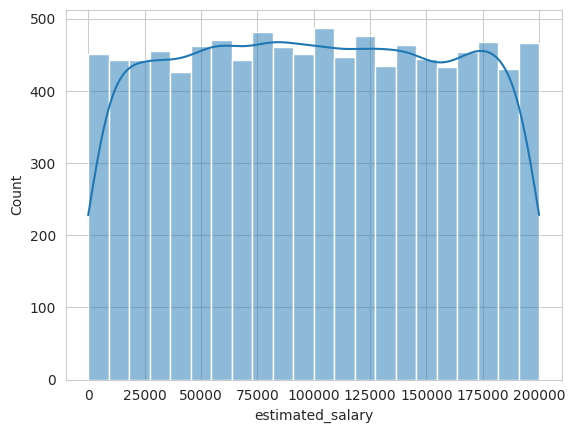

In [102]:
sns.histplot(data=data, x="estimated_salary", kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

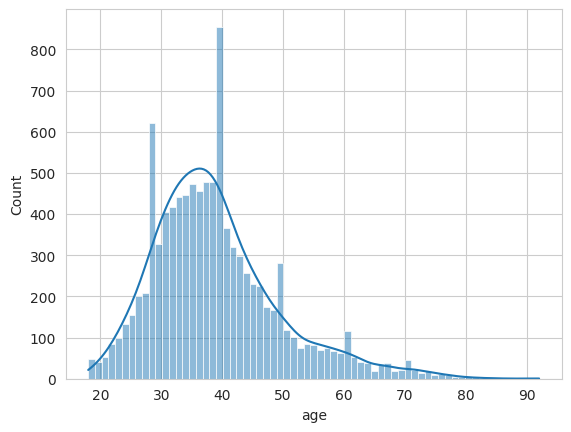

In [103]:
sns.histplot(data=data, x="age", kde=True)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

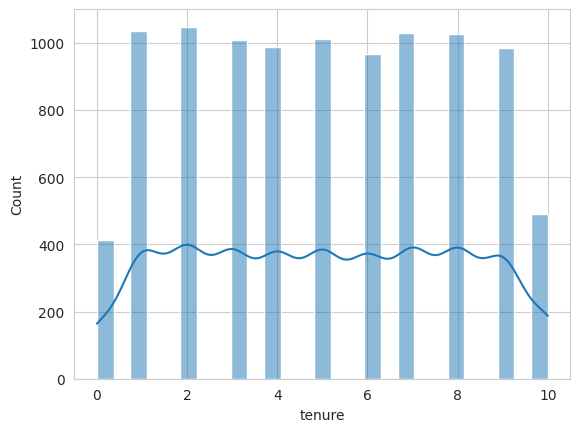

In [104]:
sns.histplot(data=data, x="tenure", kde=True)

<AxesSubplot:xlabel='products_number', ylabel='Count'>

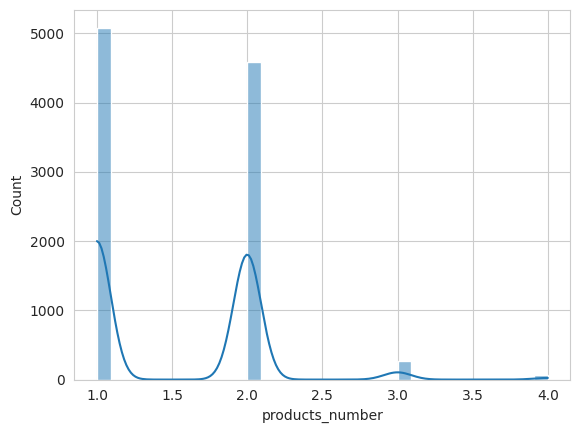

In [107]:
sns.histplot(data=data, x="products_number", kde=True)